## Analysing missing values e.g. missing values in skew_l field

In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from matplotlib.colors import LogNorm
import xarray as xr
import time
# my own 'library' below
from tree_regression import cf_tree_regression as cft
from importlib import reload

In [ ]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

In [2]:
# DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master Project/Script/Data/'
fname='ncr_pdf_douze_0125deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
add_vars = ['qvlm','qsm']
eval_fraction=0.6
regtype = 'decision_tree'
max_depth_in=None

In [6]:
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# prepro.read_netcdf()
prepro.read_netcdf()
# prepro.proc_goalvar()
prepro.proc_goalvar()
# prepro.proc_inputvars()
prepro.proc_inputvars()
missing_value=prepro.ds['skew_l'].missing_value
missing_mask=prepro.ds['skew_l']==missing_value


/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:70: UserWarning: Missing values in skew_l field were masked!
  warnings.warn("Missing values in {} field were masked!".format(var))


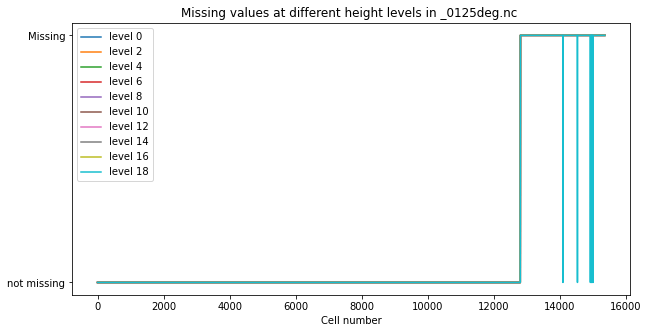

In [9]:
fig,ax=plt.subplots(figsize=(10,5))
for height_level in range(0,20,2):
    ax.plot(missing_mask[:,0,height_level],label='level {}'.format(height_level))
    
ax.legend()
ax.set_yticks([0,1])
ax.set_yticklabels(['not missing','Missing'])
ax.set_title('Missing values at different height levels in _0125deg.nc ')
ax.set_xlabel('Cell number')
plt.show()

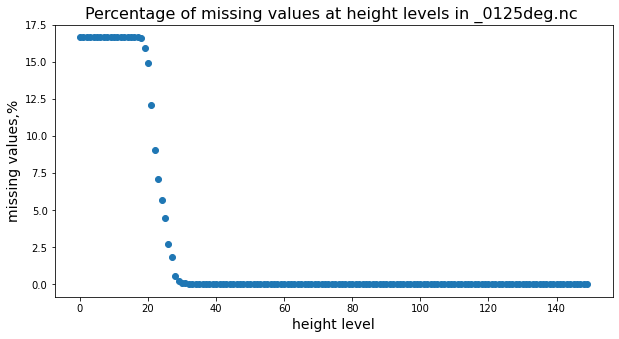

In [10]:
height_levels=missing_mask.shape[2]
total_vals=missing_mask.shape[0]
missing_heights=[]
for i in range(height_levels):
    is_missing=np.count_nonzero(missing_mask[:,0,i])
    percent_missing=is_missing/total_vals
    missing_heights.append(percent_missing*100)

fig=plt.figure(figsize=(10,5))
plt.plot(missing_heights,'o')
plt.ylabel('missing values,%',fontsize=14)
plt.xlabel('height level',fontsize=14)
plt.title('Percentage of missing values at height levels in _0125deg.nc ',fontsize=16)
plt.show()